### Classification Error Metric Challenges

**Settings:  Where applicable, use test_size=0.30, random_state=4444.  This will permit comparison of results across users.

*These reference the Classification Challenges.*

In [118]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc
from sklearn.grid_search import GridSearchCV
import matplotlib.pyplot as plt
import seaborn
from pprint import pprint
%matplotlib inline

#### Challenge 1

For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).

In [89]:
votes = pd.read_csv('voting.csv')
names = ['party','handicapped','water','adoption',
         'physician','aid_el_salvador','religion',
         'satellite','aid_nicaraguan','missile',
         'immigration','synfuels','education','superfund',
         'crime','duty_free','south_africa']
votes.columns = names
votes.replace({'n':0,'y':1,'democrat':1,'republican':0,'?':np.nan},inplace=True)
for col in votes.columns:
    if col != 'party':  
        votes[col].replace(np.nan, votes[col].mode()[0],inplace=True)

In [90]:
y = votes.pop('party')
X = votes
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=4444)

Recomputing the logistic model.

In [91]:
param_grid = {'C':.1*np.arange(1,100)}
rgr = GridSearchCV(LogisticRegression(),param_grid,cv=5)
rgr.fit(X_train,y_train)
rgr.best_params_

{'C': 0.5}

In [122]:
rgr = LogisticRegression(C=.5)
rgr.fit(X_train,y_train)
print rgr.score(X_test,y_test)
print ''
pprint(precision_recall_fscore_support(y_test,rgr.predict(X_test)))

0.466666666667

(array([ 0.  ,  0.48,  0.4 ]),
 array([ 0.        ,  0.85714286,  0.22222222]),
 array([ 0.        ,  0.61538462,  0.28571429]),
 array([ 7, 14,  9]))


Recomputing the Knn model.

In [93]:
param_grid = {'n_neighbors':np.arange(1,21)}
knn = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)
knn.fit(X_train,y_train)
knn.best_params_

{'n_neighbors': 3}

In [121]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit (X_train,y_train)
print knn.score(X_test,y_test)
print ''
pprint( precision_recall_fscore_support(y_test,knn.predict(X_test)))

0.5

(array([ 0.33333333,  0.5       ,  0.6       ]),
 array([ 0.14285714,  0.78571429,  0.33333333]),
 array([ 0.2       ,  0.61111111,  0.42857143]),
 array([ 7, 14,  9]))


#### Challenge 2

For each, draw the ROC curve and calculate the AUC.

In [99]:
rgr_probs = rgr.predict_proba(X_test)
rgr_probs_isdem = zip(*rgr_probs)[1]
rgr_fpr, rgr_tpr, _ = roc_curve(y_test,rgr_probs_isdem,pos_label=1)
rgr_auc = auc(rgr_fpr,rgr_tpr)

In [98]:
knn_probs = knn.predict_proba(X_test)
knn_probs_isdem = zip(*knn_probs)[1]
knn_fpr, knn_tpr, _ = roc_curve(y_test,knn_probs_isdem,pos_label=1)
knn_auc = auc(knn_fpr,knn_tpr)

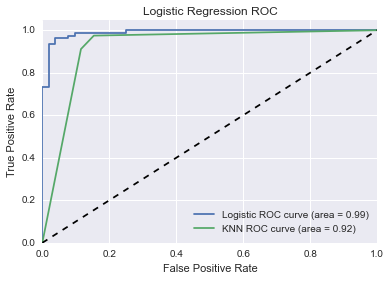

In [100]:
plt.plot(rgr_fpr, rgr_tpr, label='Logistic ROC curve (area = %0.2f)' % rgr_auc)
plt.plot(knn_fpr, knn_tpr, label='KNN ROC curve (area = %0.2f)' % knn_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC')
plt.legend(loc="lower right")

#### Challenge 3

Calculate the same metrics you did in challenge 1, but this time in a cross validation scheme with the `cross_val_score` function (like in Challenge 9).

In [103]:
param_grid = {'scoring': ['accuracy','precision','recall','f1']}

In [111]:
print 'logistic regression'
for metric in param_grid['scoring']:
    print metric + '  '+ str(np.mean(cross_val_score(rgr,X_train,y_train,scoring=metric)))

logistic regression
accuracy  0.957126124377
precision  0.974635021613
recall  0.957501280082
f1  0.964946841776


In [112]:
print 'knn '
for metric in param_grid['scoring']:
    print metric + '  '+ str(np.mean(cross_val_score(knn,X_train,y_train,scoring=metric)))

knn 
accuracy  0.897617938264
precision  0.977044025157
recall  0.856289469193
f1  0.911841640156


#### Challenge 4

For your movie classifiers, calculate the precision and recall for each class.

In [113]:
movies = pd.read_csv('movies.csv')
movies.replace({"G":"<= PG","PG":"<= PG"},inplace=True)
y = movies.pop('Rating')
X = movies.drop(['Title','Director','ReleaseDate'],axis=1)
X = X.fillna(X.mean())
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.30,random_state=4444)

In [120]:
rgr = LogisticRegression(C=0.100)
rgr.fit(X_train,y_train)
print rgr.classes_
pprint(precision_recall_fscore_support(y_test,rgr.predict(X_test)))

['<= PG' 'PG-13' 'R']
(array([ 0.  ,  0.48,  0.4 ]),
 array([ 0.        ,  0.85714286,  0.22222222]),
 array([ 0.        ,  0.61538462,  0.28571429]),
 array([ 7, 14,  9]))


#### Challenge 5

Draw the ROC curve (and calculate AUC) for the logistic regression classifier from challenge 12.

In [123]:
haberman = pd.read_csv('haberman.csv',header=None)
names = ['age','surgery_yr','num_pos','survival']
haberman.columns = names
haberman.survival.replace({2:0},inplace=True)
y = haberman.pop('survival')
X= haberman
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3)
rgr = LogisticRegression(C=.1)
rgr.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

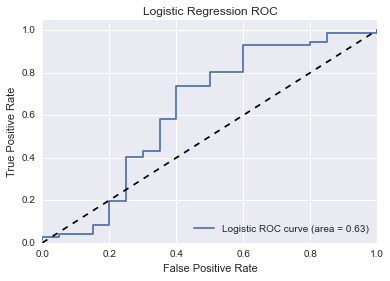

In [129]:
probs = rgr.predict_proba(X_test)
fpr,tpr,_ = roc_curve(y_test,zip(*probs)[1],pos_label=1)
area = auc(fpr,tpr)
plt.plot(fpr, tpr, label='Logistic ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC')
plt.legend(loc="lower right")